# Simple K-means

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def initialize_centroids(X, k):
    """
    Randomly initialize k centroids from the dataset X.
    """
    centroids = X.copy()
    np.random.shuffle(centroids)
    return centroids[:k]


def compute_distance(X, centroids):
    """
    Compute the distance between each data point and each centroid.
    """
    return np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)


def assign_clusters(X, centroids):
    """
    Assign each point to the nearest centroid.
    """
    distances = compute_distance(X, centroids)
    return np.argmin(distances, axis=1)


def update_centroids(X, labels, k):
    """
    Update centroids as the mean of points assigned to each cluster.
    """
    new_centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        points_in_cluster = X[labels == i]
        if points_in_cluster.size:
            new_centroids[i] = points_in_cluster.mean(axis=0)
    return new_centroids


def has_converged(old_centroids, centroids, tol=1e-4):
    """
    Check if the algorithm has converged by comparing old and new centroids.
    """
    return np.linalg.norm(centroids - old_centroids) < tol


def kmeans(X, k, max_iters=100):
    """
    K-Means clustering algorithm.
    """
    # Step 1: Initialize centroids randomly
    centroids = initialize_centroids(X, k)

    for _ in range(max_iters):
        # Step 2: Assign clusters
        labels = assign_clusters(X, centroids)

        # Step 3: Update centroids
        new_centroids = update_centroids(X, labels, k)

        # Step 4: Check for convergence
        if has_converged(centroids, new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

In [5]:
# Create a simple dataset
np.random.seed(42)
X = np.vstack(
    (
        np.random.normal(loc=[2, 2], scale=0.5, size=(50, 2)),
        np.random.normal(loc=[-2, -2], scale=0.5, size=(50, 2)),
        np.random.normal(loc=[2, -2], scale=0.5, size=(50, 2)),
    )
)
X.shape

(150, 2)

In [6]:
# Run K-Means with 3 clusters
k = 3
labels, centroids = kmeans(X, k)

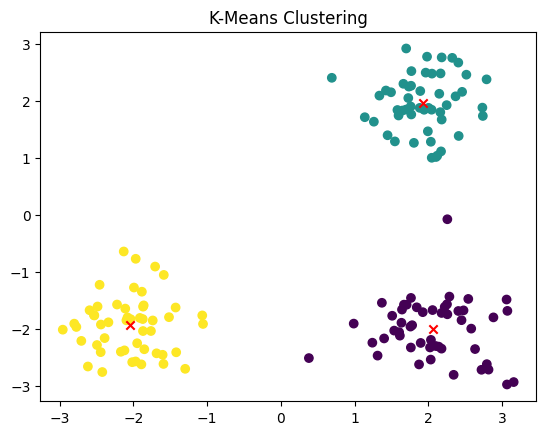

In [7]:
# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis")
plt.scatter(centroids[:, 0], centroids[:, 1], c="red", marker="x")
plt.title("K-Means Clustering")
plt.show()

# Pandas k-means

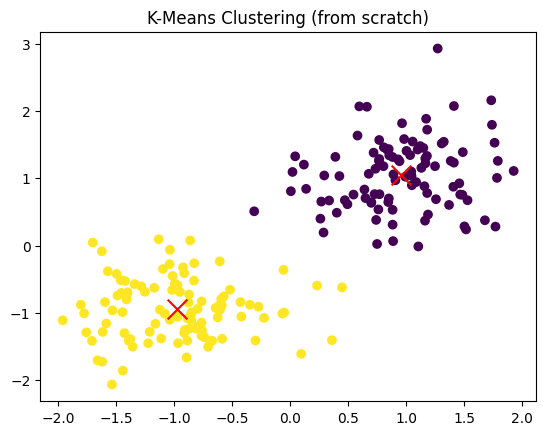

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Step 1: Initialize K-Means parameters
def initialize_centroids(data, k):
    """Randomly initialize centroids by selecting k random points from the dataset."""
    centroids = data.sample(
        n=k
    ).to_numpy()  # Randomly select k rows as initial centroids
    return centroids


# Step 2: Assign points to the nearest centroid
def assign_clusters(data, centroids):
    """Assign each data point to the nearest centroid."""
    distances = np.sqrt(((data.to_numpy()[:, np.newaxis] - centroids) ** 2).sum(axis=2))
    return np.argmin(distances, axis=1)  # Return the index of the nearest centroid


# Step 3: Update centroids by calculating the mean of points in each cluster
def update_centroids(data, labels, k):
    """Update centroid positions by taking the mean of the points assigned to each cluster."""
    new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids


# K-Means Clustering Algorithm
def kmeans(data, k, max_iters=100, tol=1e-4):
    """Perform K-Means clustering from scratch."""
    # Initialize centroids
    centroids = initialize_centroids(data, k)

    for _ in range(max_iters):
        old_centroids = centroids.copy()

        # Assign clusters
        labels = assign_clusters(data, centroids)

        # Update centroids
        centroids = update_centroids(data, labels, k)

        # Check for convergence (if centroids do not change much)
        if np.all(np.abs(centroids - old_centroids) < tol):
            break

    return centroids, labels


# Step 4: Test the K-Means implementation

# Example dataset: Create some simple 2D data points
np.random.seed(42)
data = pd.DataFrame(
    {
        "x": np.concatenate(
            [np.random.randn(100) * 0.5 + 1, np.random.randn(100) * 0.5 - 1]
        ),
        "y": np.concatenate(
            [np.random.randn(100) * 0.5 + 1, np.random.randn(100) * 0.5 - 1]
        ),
    }
)

# Perform K-Means clustering
k = 2
centroids, labels = kmeans(data, k)

# Plot the results
plt.scatter(data["x"], data["y"], c=labels, cmap="viridis")
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c="red", marker="x")
plt.title("K-Means Clustering (from scratch)")
plt.show()